# LW Regression

In [52]:
import numpy as np
import matplotlib.pyplot as plt

In [53]:
tou=0.8
x_train=np.array(list(range(3,33))+[3.2,4.2])
x_train

array([ 3. ,  4. ,  5. ,  6. ,  7. ,  8. ,  9. , 10. , 11. , 12. , 13. ,
       14. , 15. , 16. , 17. , 18. , 19. , 20. , 21. , 22. , 23. , 24. ,
       25. , 26. , 27. , 28. , 29. , 30. , 31. , 32. ,  3.2,  4.2])

In [54]:
x_train=x_train[:,np.newaxis]
x_train.shape

(32, 1)

In [55]:
y_train=np.array([1,2,1,2,1,2,3,3,1,3,1,1,3,4,5,6,7,8,8,9,11,12,13,11,12,12,13,15,16,17,18,19])
y_train=y_train[:,np.newaxis]

In [56]:
x_test=np.array([i/10 for i in range(400)])
x_test=x_test[:,np.newaxis]
# x_test

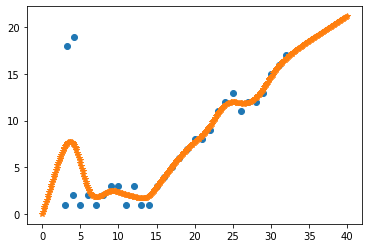

In [57]:
y_test=[]

for i in x_test:
#     print(i)
    try:
        wt=np.exp(-np.sum((x_train-i)**2,axis=1)/(2*tou)**2)
        w=np.diag(wt)
        part1=np.linalg.inv(x_train.T.dot(w).dot(x_train))
        part2=part1.dot(x_train.T).dot(w).dot(y_train)
        prediction=i.dot(part2)
        y_test.append(prediction)
    except:
        pass
y_test=np.array(y_test)
plt.plot(x_train.squeeze(),y_train,'o')
plt.plot(x_test.squeeze(),y_test,'*')
plt.show()

# KNN Classifier

In [58]:
from sklearn import datasets
iris=datasets.load_iris()
x=iris.data
y=iris.target

In [59]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=23)

In [60]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain,ytrain)
y_pred=knn.predict(xtest)

C:\Users\vinee\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [61]:
from sklearn import metrics
print(metrics.accuracy_score(y_pred,ytest))
print(metrics.confusion_matrix(ytest,y_pred))
print(metrics.classification_report(ytest,y_pred))

0.9666666666666667
[[12  0  0]
 [ 0  8  0]
 [ 0  1  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.89      1.00      0.94         8
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [62]:
mat=metrics.confusion_matrix(ytest,y_pred)
# mat
c=0
w=0
for i in range(len(mat)):
    for j in range(len(mat[0])):
        if i==j:
            c+=mat[i][j]
        else:
            w+=mat[i][j]
print(c,w)

29 1


# EM KMean GaussianMixture

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [64]:
iris=datasets.load_iris()
print(iris.data,iris.feature_names,iris.target,iris.target_names)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [65]:
x=pd.DataFrame(iris.data)
x.columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
y=pd.DataFrame(iris.target)
y.columns=['Targets']

In [66]:
model=KMeans(n_clusters=3,random_state=100)
model.fit(x)
y_pred=model.labels_

In [67]:
gmm=GaussianMixture(n_components=3,covariance_type='full',random_state=100)
gmm.fit(x)
y_pred_gmm=gmm.predict(x)

Text(0.5, 1.0, 'GMM')

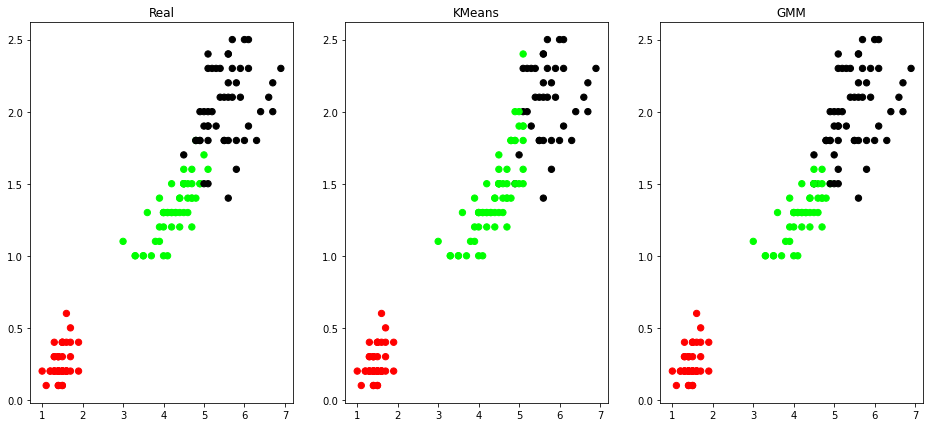

In [68]:
colormap=np.array(['red','lime','black'])
plt.figure(figsize=(16,7))
plt.subplot(1,3,1)
plt.scatter(x.petal_length,x.petal_width,c=colormap[y.Targets],s=40)
plt.title("Real")
plt.subplot(1,3,2)
plt.scatter(x.petal_length,x.petal_width,c=colormap[y_pred],s=40)
plt.title("KMeans")
plt.subplot(1,3,3)
plt.scatter(x.petal_length,x.petal_width,c=colormap[y_pred_gmm],s=40)
plt.title("GMM")

In [69]:
print("KMeans\n",metrics.accuracy_score(y,y_pred))
print("KMeans\n",metrics.confusion_matrix(y,y_pred))
print("GMM\n",metrics.accuracy_score(y,y_pred_gmm))
print("GMM\n",metrics.confusion_matrix(y,y_pred_gmm))

KMeans
 0.8933333333333333
KMeans
 [[50  0  0]
 [ 0 48  2]
 [ 0 14 36]]
GMM
 0.9666666666666667
GMM
 [[50  0  0]
 [ 0 45  5]
 [ 0  0 50]]


# Naive Bayes

In [70]:
filename = 'diabetes.csv'
import pandas as pd
import numpy as np

df= pd.read_csv(filename)
df = df.astype(float)

train=df.sample(frac=0.8,random_state=100)
print(train)
test=df.drop(train.index)
print(test)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
173          1.0     79.0           60.0           42.0     48.0  43.5   
253          0.0     86.0           68.0           32.0      0.0  35.8   
207          5.0    162.0          104.0            0.0      0.0  37.7   
737          8.0     65.0           72.0           23.0      0.0  32.0   
191          9.0    123.0           70.0           44.0     94.0  33.1   
..           ...      ...            ...            ...      ...   ...   
401          6.0    137.0           61.0            0.0      0.0  24.2   
82           7.0     83.0           78.0           26.0     71.0  29.3   
650          1.0     91.0           54.0           25.0    100.0  25.2   
721          1.0    114.0           66.0           36.0    200.0  38.1   
74           1.0     79.0           75.0           30.0      0.0  32.0   

     DiabetesPedigreeFunction   Age  Outcome  
173                     0.678  23.0      0.0  
253              

In [71]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
data_train = train.iloc[:,:-1]
target_train  = train.iloc[:,-1]
gnb.fit(data_train, target_train)

data_test = test.iloc[:,:-1]
y_pred = gnb.predict(data_test)


from sklearn import metrics
print(f'Split {len(df)} rows into train={len(data_train)} and test={len(data_test)}')
print("Accuracy:",(metrics.accuracy_score(test.iloc[:,-1], y_pred)*100))

Split 768 rows into train=614 and test=154
Accuracy: 74.02597402597402


In [72]:
outcome_group = train.groupby(df.columns[-1])
n_attr = len(df.columns) -1
summaries = {}

for classValue, instances in outcome_group:
    attr_mv=[]
    mean=list(instances.mean(axis=0).values)
    stdev=list(instances.std(axis=0).values)
    for i in range(n_attr):
        attr_mv.append([mean[i],stdev[i]])
        
    summaries[classValue]=attr_mv

import math
def calculateProb(x, mean, stdev):
    exponent = math.exp(-math.pow(x-mean,2)/(2*math.pow(stdev,2)))
    return (1 / (math.sqrt(2*math.pi)*math.pow(stdev,2))) * exponent
  

def calculateClassProb(summaries, X_vec):
    probabilities = {}
    for classValue, classSummaries in summaries.items():
        probabilities[classValue] = 1
        for i in range(len(classSummaries)):
            mean, stdev = classSummaries[i]
            x = X_vec[i]
            probabilities[classValue] *= calculateProb(x, mean, stdev)         
    return probabilities 
   
def predict(summaries, X_vec):
    prob = calculateClassProb(summaries, X_vec)
    bestLabel, bestProb = None, -1
    for classValue, probability in prob.items():
        if bestLabel is None or probability > bestProb:
            bestProb = probability
            bestLabel = classValue
    return bestLabel

predictions = []
testSet=test.values.tolist()

for i in range(len(testSet)):
    result = predict(summaries, testSet[i])
    predictions.append(result)

def getAccuracy(test, predictions):
    correct = 0
    for i in range(len(test)):
        if test.iloc[i,-1] == predictions[i]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0

accuracy = getAccuracy(test, predictions)
print(f'Split {len(df)} rows into train={len(train)} and test={len(test)}')
print(f'Accuracy: {accuracy}')

Split 768 rows into train=614 and test=154
Accuracy: 74.67532467532467
